In [ ]:
!python -m pip install --upgrade pip
!python -m pip install autogluon

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
from sklearn.preprocessing import LabelEncoder

In [ ]:
train_df = pd.read_csv('/content/drive/MyDrive/train.csv')
test_df = pd.read_csv('/content/drive/MyDrive/test.csv')


In [ ]:
train_df

,ID,timestamp,item,corporation,location,supply(kg),price(원/kg)
0,TG_A_J_20190101,2019-01-01,TG,A,J,0.0,0.0
1,TG_A_J_20190102,2019-01-02,TG,A,J,0.0,0.0
2,TG_A_J_20190103,2019-01-03,TG,A,J,60601.0,1728.0
3,TG_A_J_20190104,2019-01-04,TG,A,J,25000.0,1408.0
4,TG_A_J_20190105,2019-01-05,TG,A,J,32352.0,1250.0
...,...,...,...,...,...,...,...
59392,RD_F_J_20230227,2023-02-27,RD,F,J,452440.0,468.0
59393,RD_F_J_20230228,2023-02-28,RD,F,J,421980.0,531.0
59394,RD_F_J_20230301,2023-03-01,RD,F,J,382980.0,574.0
59395,RD_F_J_20230302,2023-03-02,RD,F,J,477220.0,523.0


In [ ]:
test_df

,ID,timestamp,item,corporation,location
0,TG_A_J_20230304,2023-03-04,TG,A,J
1,TG_A_J_20230305,2023-03-05,TG,A,J
2,TG_A_J_20230306,2023-03-06,TG,A,J
3,TG_A_J_20230307,2023-03-07,TG,A,J
4,TG_A_J_20230308,2023-03-08,TG,A,J
...,...,...,...,...,...
1087,RD_F_J_20230327,2023-03-27,RD,F,J
1088,RD_F_J_20230328,2023-03-28,RD,F,J
1089,RD_F_J_20230329,2023-03-29,RD,F,J
1090,RD_F_J_20230330,2023-03-30,RD,F,J


In [ ]:
# 데이터 전처리
# 변수 별 확인하기 위해
train_df['item_id'] = train_df['ID'].str[:6]


# 시계열로 변환

train_df['timestamp'] = pd.to_datetime(train_df['timestamp'])
test_df['timestamp'] = pd.to_datetime(test_df['timestamp'])


# 날짜 데이터 분리
train_df['year'] = train_df['timestamp'].dt.year
train_df['month'] = train_df['timestamp'].dt.month
train_df['day'] = train_df['timestamp'].dt.day
train_df['weekday'] = train_df['timestamp'].dt.weekday

test_df['year'] = test_df['timestamp'].dt.year
test_df['month'] = test_df['timestamp'].dt.month
test_df['day'] = test_df['timestamp'].dt.day
test_df['weekday'] = test_df['timestamp'].dt.weekday

In [ ]:
train_df

,ID,timestamp,item,corporation,location,supply(kg),price(원/kg),item_id,year,month,day,weekday
0,TG_A_J_20190101,2019-01-01,TG,A,J,0.0,0.0,TG_A_J,2019,1,1,1
1,TG_A_J_20190102,2019-01-02,TG,A,J,0.0,0.0,TG_A_J,2019,1,2,2
2,TG_A_J_20190103,2019-01-03,TG,A,J,60601.0,1728.0,TG_A_J,2019,1,3,3
3,TG_A_J_20190104,2019-01-04,TG,A,J,25000.0,1408.0,TG_A_J,2019,1,4,4
4,TG_A_J_20190105,2019-01-05,TG,A,J,32352.0,1250.0,TG_A_J,2019,1,5,5
...,...,...,...,...,...,...,...,...,...,...,...,...
59392,RD_F_J_20230227,2023-02-27,RD,F,J,452440.0,468.0,RD_F_J,2023,2,27,0
59393,RD_F_J_20230228,2023-02-28,RD,F,J,421980.0,531.0,RD_F_J,2023,2,28,1
59394,RD_F_J_20230301,2023-03-01,RD,F,J,382980.0,574.0,RD_F_J,2023,3,1,2
59395,RD_F_J_20230302,2023-03-02,RD,F,J,477220.0,523.0,RD_F_J,2023,3,2,3


In [ ]:
test_df

,ID,timestamp,item,corporation,location,year,month,day,weekday
0,TG_A_J_20230304,2023-03-04,TG,A,J,2023,3,4,5
1,TG_A_J_20230305,2023-03-05,TG,A,J,2023,3,5,6
2,TG_A_J_20230306,2023-03-06,TG,A,J,2023,3,6,0
3,TG_A_J_20230307,2023-03-07,TG,A,J,2023,3,7,1
4,TG_A_J_20230308,2023-03-08,TG,A,J,2023,3,8,2
...,...,...,...,...,...,...,...,...,...
1087,RD_F_J_20230327,2023-03-27,RD,F,J,2023,3,27,0
1088,RD_F_J_20230328,2023-03-28,RD,F,J,2023,3,28,1
1089,RD_F_J_20230329,2023-03-29,RD,F,J,2023,3,29,2
1090,RD_F_J_20230330,2023-03-30,RD,F,J,2023,3,30,3


In [ ]:
test_df['item_id'] = test_df['item'] + '_' + test_df['corporation'] + '_' + test_df['location']

In [ ]:
# 모델을 위한 데이터준비
from autogluon.timeseries import TimeSeriesDataFrame, TimeSeriesPredictor
tr_time_df = TimeSeriesDataFrame(train_df.drop(columns=['ID','corporation','location','item']))
test_time_df = TimeSeriesDataFrame(test_df.drop(columns=['ID','corporation','location', 'item']))

In [ ]:
tr_time_df
# 훈련 데이터 완성본

supply(kg)  price(원/kg)  year  month  day  weekday
item_id timestamp                                                     
TG_A_J  2019-01-01         0.0          0.0  2019      1    1        1
        2019-01-02         0.0          0.0  2019      1    2        2
        2019-01-03     60601.0       1728.0  2019      1    3        3
        2019-01-04     25000.0       1408.0  2019      1    4        4
        2019-01-05     32352.0       1250.0  2019      1    5        5
...                        ...          ...   ...    ...  ...      ...
RD_F_J  2023-02-27    452440.0        468.0  2023      2   27        0
        2023-02-28    421980.0        531.0  2023      2   28        1
        2023-03-01    382980.0        574.0  2023      3    1        2
        2023-03-02    477220.0        523.0  2023      3    2        3
        2023-03-03    427520.0        529.0  2023      3    3        4

[59397 rows x 6 columns]

In [ ]:
test_time_df

year  month  day  weekday
item_id timestamp                            
TG_A_J  2023-03-04  2023      3    4        5
        2023-03-05  2023      3    5        6
        2023-03-06  2023      3    6        0
        2023-03-07  2023      3    7        1
        2023-03-08  2023      3    8        2
...                  ...    ...  ...      ...
RD_F_J  2023-03-27  2023      3   27        0
        2023-03-28  2023      3   28        1
        2023-03-29  2023      3   29        2
        2023-03-30  2023      3   30        3
        2023-03-31  2023      3   31        4

[1092 rows x 4 columns]

In [ ]:
# TimeSeriesPredictor를 이용하여서 price(원/kg)을 target으로 잡고 eval_metric을 RMSE를 이용한다.
# tr_time_df
model = TimeSeriesPredictor(prediction_length = 28,target = 'price(원/kg)', known_covariates_names=["year", "month", "day", "weekday"], eval_metric='RMSE')
model.fit(tr_time_df,presets="best_quality", time_limit=20000, random_seed=42) # fitting
result = model.predict(tr_time_df, known_covariates=test_time_df, random_seed=42) # 예측(테스트 데이터를 이용)

Beginning AutoGluon training... Time limit = 20000s
AutoGluon will save models to 'AutogluonModels/ag-20231203_101521'
=================== System Info ===================
AutoGluon Version:  1.0.0
Python Version:     3.10.12
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #1 SMP Wed Aug 30 11:19:59 UTC 2023
CPU Count:          2
GPU Count:          0
Memory Avail:       11.39 GB / 12.68 GB (89.9%)
Disk Space Avail:   73.54 GB / 107.72 GB (68.3%)
Setting presets to: best_quality

Fitting with arguments:
{'enable_ensemble': True,
 'eval_metric': RMSE,
 'hyperparameters': 'default',
 'known_covariates_names': ['year', 'month', 'day', 'weekday'],
 'num_val_windows': 2,
 'prediction_length': 28,
 'quantile_levels': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9],
 'random_seed': 42,
 'refit_every_n_windows': 1,
 'refit_full': False,
 'target': 'price(원/kg)',
 'time_limit': 20000,
 'verbosity': 2}

Inferred time series frequency: 'D'
Provided train_data has 59397 rows,

In [ ]:
train_accuracy_dict = model.evaluate(tr_time_df, display = True)

Model not specified in predict, will default to the model with the best validation score: WeightedEnsemble
Evaluations on test data:
{
    "RMSE": -704.7158034233897
}


KeyError: ignored

In [ ]:
final = pd.DataFrame(result).reset_index()
final

,item_id,timestamp,mean,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,TG_A_J,2023-03-04,3189.025231,1109.285096,1788.840837,2282.259436,2782.405985,3221.265231,3672.751438,4122.645016,4639.532624,5424.985718
1,TG_A_J,2023-03-05,164.291875,-2247.034648,-1427.928452,-841.350756,-366.753660,57.184160,549.659360,1045.290120,1617.419888,2385.152939
2,TG_A_J,2023-03-06,3012.665121,307.855243,1275.357086,1928.127480,2491.393148,2984.241932,3450.143283,4005.699570,4635.339817,5517.781280
3,TG_A_J,2023-03-07,2972.665487,157.090178,1119.084059,1774.824608,2347.848978,2866.907644,3431.820007,3994.049764,4628.144493,5587.723242
4,TG_A_J,2023-03-08,3171.397039,389.107578,1323.051730,2034.337886,2612.563620,3144.907991,3674.739541,4291.992869,5058.483915,6068.252887
...,...,...,...,...,...,...,...,...,...,...,...,...
1087,RD_F_J,2023-03-27,506.155302,-330.265443,-48.088654,154.222608,335.378236,503.620604,660.208721,834.677327,1041.117014,1339.961309
1088,RD_F_J,2023-03-28,517.558160,-334.906494,-42.441051,167.520853,345.033061,520.382665,694.381222,867.606449,1070.853361,1360.251372
1089,RD_F_J,2023-03-29,526.026804,-358.080676,-64.095777,163.530254,343.640480,518.485861,682.779038,872.097919,1095.281036,1384.269651
1090,RD_F_J,2023-03-30,507.294072,-370.062173,-68.341451,145.796282,331.161117,499.228220,668.816755,853.916549,1074.957444,1372.554618


In [ ]:
# 공휴일 삼일절과 일요일 0으로 바꾸기
final.loc[final['timestamp']=='2023-03-01','mean'] = 0
final.loc[final['timestamp']=='2023-03-05','mean'] = 0
final.loc[final['timestamp']=='2023-03-12','mean'] = 0
final.loc[final['timestamp']=='2023-03-19','mean'] = 0
final.loc[final['timestamp']=='2023-03-26','mean'] = 0

In [ ]:
final

,item_id,timestamp,mean,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,TG_A_J,2023-03-04,3189.025231,1109.285096,1788.840837,2282.259436,2782.405985,3221.265231,3672.751438,4122.645016,4639.532624,5424.985718
1,TG_A_J,2023-03-05,0.000000,-2247.034648,-1427.928452,-841.350756,-366.753660,57.184160,549.659360,1045.290120,1617.419888,2385.152939
2,TG_A_J,2023-03-06,3012.665121,307.855243,1275.357086,1928.127480,2491.393148,2984.241932,3450.143283,4005.699570,4635.339817,5517.781280
3,TG_A_J,2023-03-07,2972.665487,157.090178,1119.084059,1774.824608,2347.848978,2866.907644,3431.820007,3994.049764,4628.144493,5587.723242
4,TG_A_J,2023-03-08,3171.397039,389.107578,1323.051730,2034.337886,2612.563620,3144.907991,3674.739541,4291.992869,5058.483915,6068.252887
...,...,...,...,...,...,...,...,...,...,...,...,...
1087,RD_F_J,2023-03-27,506.155302,-330.265443,-48.088654,154.222608,335.378236,503.620604,660.208721,834.677327,1041.117014,1339.961309
1088,RD_F_J,2023-03-28,517.558160,-334.906494,-42.441051,167.520853,345.033061,520.382665,694.381222,867.606449,1070.853361,1360.251372
1089,RD_F_J,2023-03-29,526.026804,-358.080676,-64.095777,163.530254,343.640480,518.485861,682.779038,872.097919,1095.281036,1384.269651
1090,RD_F_J,2023-03-30,507.294072,-370.062173,-68.341451,145.796282,331.161117,499.228220,668.816755,853.916549,1074.957444,1372.554618


In [ ]:
print(train_accuracy_dict)

{'RMSE': -704.7158034233897}


In [ ]:
submission = pd.read_csv('/content/drive/MyDrive/sample_submission.csv')
submission['answer'] = final.reset_index()['mean']
submission.loc[submission['answer'] < 0.0, 'answer'] = 0.0
submission.to_csv('./final_submission.csv', index=False)

In [ ]:
submission

,ID,answer
0,TG_A_J_20230304,3189.025231
1,TG_A_J_20230305,0.000000
2,TG_A_J_20230306,3012.665121
3,TG_A_J_20230307,2972.665487
4,TG_A_J_20230308,3171.397039
...,...,...
1087,RD_F_J_20230327,506.155302
1088,RD_F_J_20230328,517.558160
1089,RD_F_J_20230329,526.026804
1090,RD_F_J_20230330,507.294072


In [ ]:
results_frame = pd.concat([tr_time_df.loc[:, 'price(원/kg)'], final.reset_index()['mean']])
results_data_frame = pd.concat([train_df['timestamp'], test_df['timestamp']])

In [ ]:
results_frame

(TG_A_J, 2019-01-01 00:00:00)       0.000000
(TG_A_J, 2019-01-02 00:00:00)       0.000000
(TG_A_J, 2019-01-03 00:00:00)    1728.000000
(TG_A_J, 2019-01-04 00:00:00)    1408.000000
(TG_A_J, 2019-01-05 00:00:00)    1250.000000
                                    ...     
1087                              506.155302
1088                              517.558160
1089                              526.026804
1090                              507.294072
1091                              509.046970
Length: 60489, dtype: float64

In [ ]:
results_data_frame

0      2019-01-01
1      2019-01-02
2      2019-01-03
3      2019-01-04
4      2019-01-05
          ...    
1087   2023-03-27
1088   2023-03-28
1089   2023-03-29
1090   2023-03-30
1091   2023-03-31
Name: timestamp, Length: 60489, dtype: datetime64[ns]

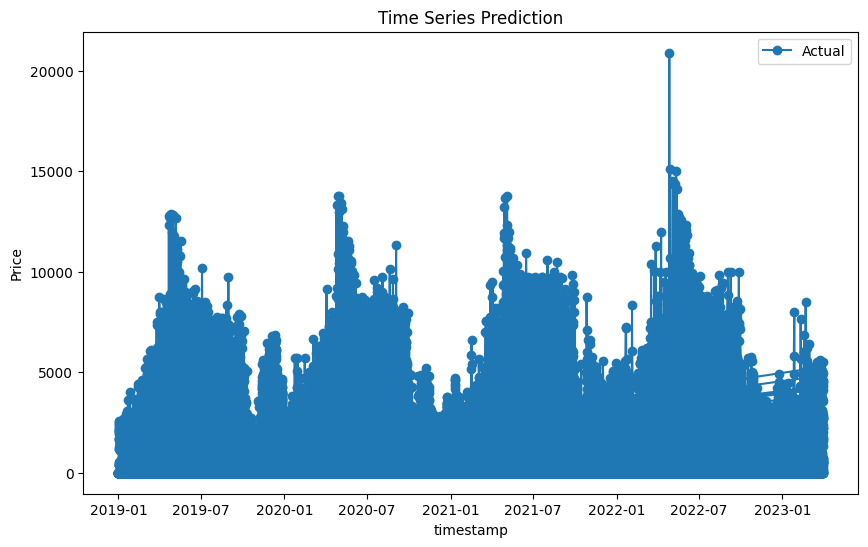

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(results_data_frame, results_frame, label='Actual', marker='o')
plt.xlabel('timestamp')
plt.ylabel('Price')
plt.title('Time Series Prediction')
plt.legend()
plt.show()